# University of Applied Sciences Munich
## Kalman Filter Tutorial

---
(c) Lukas Köstler (lkskstlr@gmail.com)

## Exercise 1 - Ball Flight

#### Task:
You are given data (height and velocity) of a ball that was shot straight into the air.

In [39]:
my_name = "QuiteBad" # Only Alphanumeric characters

In [24]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 3)

import re

import numpy as np
from scipy.integrate import quad
%matplotlib notebook

In [2]:
# Load Data
tt = np.genfromtxt('time.csv')
zz = np.genfromtxt('measurements.csv')
vv = np.genfromtxt('velocity.csv')
xx = np.genfromtxt('groundtruth.csv')

In [41]:
### Big Kalman Filter Function
def kalman_step(mu_n, sigma_n, z_np1, velocity_n):
        
    
    ##### Predict step (dt = 0.1) #####
    # Parameters
    a = 1.0
    b = 0.1 # = dt
    sigma_w = 10.0 # Just a guess
    
    # Control
    bu_n = b * velocity_n
    
    # Compute
    mu_np1_n = a*mu_n + bu_n 
    sigma_np1_n = np.sqrt(a**2 * sigma_n**2 + sigma_w**2)
    
    
    
    
    ##### Update step #####
    # Parameters
    c = 1.0
    sigma_v = 10.0
    
    # Compute
    mu_np1_np1 = mu_np1_n + ((sigma_np1_n**2 * c) / (sigma_v**2 + c**2 * sigma_np1_n**2)) * (z_np1 - c*mu_np1_n)
    sigma_np1_np1 = np.sqrt(sigma_np1_n**2 - ((sigma_np1_n**4 * c**2) / (sigma_v**2 + c**2 * sigma_np1_n**2)))
    
    return mu_np1_np1, sigma_np1_np1

In [42]:
## Total Filter Run
mus = np.zeros_like(zz)
sigmas = np.zeros_like(zz)

# Initial
mus[0] = zz[0]
sigmas[0] = 2.0

for i in range(1, len(zz)):
    mu_np1_np1, sigma_np1_np1 = kalman_step(
        mus[i-1],
        sigmas[i-1],
        zz[i],
        vv[i-1])
    
    mus[i] = mu_np1_np1
    sigmas[i] = sigma_np1_np1

<IPython.core.display.Javascript object>


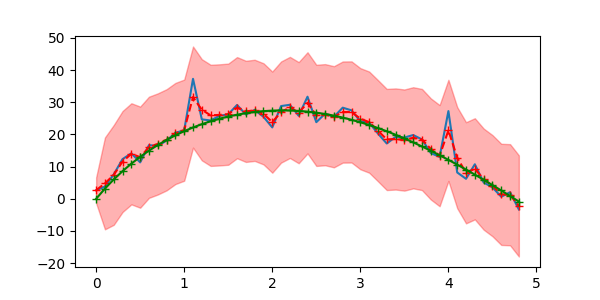

In [43]:
plt.figure()
plt.plot(tt, zz)
plt.plot(tt, mus, 'r--+')
plt.fill_between(tt, mus-2*sigmas, mus+2*sigmas,  alpha=0.3, color='r')
plt.plot(tt, xx, '+-g')

<IPython.core.display.Javascript object>


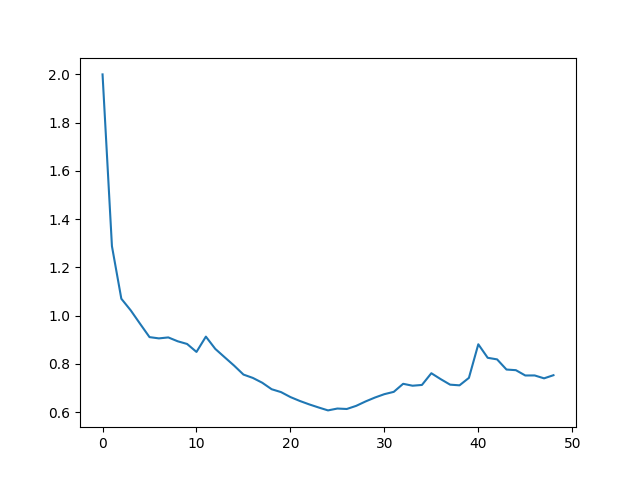

In [6]:
plt.figure()
plt.plot(sigmas)

In [44]:
##### SAVE YOUR RESULTS #####
stripped_name = re.sub(r'\W+', '', my_name)

np.savetxt(stripped_name+'_mus.csv', mus)
np.savetxt(stripped_name+'_sigmas.csv', sigmas)